In [6]:
# Reading in the data:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import interp1d
trainData = pd.read_csv('../data/1e7data_train.csv', index_col=0)
testData = pd.read_csv('../data/1e7data_holdout.csv', index_col=0)
df = trainData
dftest = testData
df.tail()

,Stable,Norbits_instability,Norbits,Mplanet,RH/a,a1,P1,e1,pomega1,inc1,...,norm_min_e2,norm_min_window10_e2,norm_min_e3,norm_min_window10_e3,norm_min_inc1,norm_min_window10_inc1,norm_min_inc2,norm_min_window10_inc2,norm_min_inc3,norm_min_window10_inc3
Sim_ID,,,,,,,,,,,,,,,,,,,,,
4465,True,1.000000e+07,10000000.0,0.000015,0.021544,0.049234,0.010924,0.011821,2.166832,0.011453,...,0.000584,0.025326,0.000058,0.010939,0.000067,0.000212,0.000205,0.001258,0.002236,0.004439
4231,False,5.556366e+05,10000000.0,0.000015,0.021544,0.043888,0.009194,0.004916,-1.426257,0.007699,...,0.000374,0.155129,0.000066,0.002199,0.000106,0.000375,0.000007,0.034136,0.000070,0.000463
487,False,1.955824e+06,10000000.0,0.000015,0.021544,0.056372,0.013384,0.006294,-0.410190,0.003253,...,0.000039,0.023756,0.000583,0.002526,0.000630,0.003254,0.000256,0.000608,0.000759,0.000256
2210,False,4.607903e+03,10000000.0,0.000015,0.021544,0.054535,0.012735,0.007372,-1.748617,0.015612,...,0.000702,0.005107,0.000400,0.006366,0.005785,0.000889,0.000212,0.000663,0.000126,0.000314
4390,True,1.000000e+07,10000000.0,0.000015,0.021544,0.042994,0.008915,0.009054,2.988464,0.013263,...,0.000565,0.008115,0.000088,0.010731,0.000342,0.000861,0.000082,0.001282,0.000835,0.000491


In [7]:
features = []
features += ['daOverRH1', 'daOverRH2']
features += ['mindaOverRH', 'maxdaOverRH']
#features += ['daOvera1', 'daOvera2']
#features += ['mindaOvera', 'maxdaOvera']
features += ['norm_std_a1', 'norm_max_a1', 'norm_std_window10_a1', 'norm_max_window10_a1']
features += ['norm_std_a2', 'norm_max_a2', 'norm_std_window10_a2', 'norm_max_window10_a2']
features += ['norm_std_a3', 'norm_max_a3', 'norm_std_window10_a3', 'norm_max_window10_a3']
#features += ['norm_std_e1', 'norm_max_e1', 'norm_std_window10_e1', 'norm_max_window10_e1']
#features += ['norm_std_e2', 'norm_max_e2', 'norm_std_window10_e2', 'norm_max_window10_e2']
#features += ['norm_std_e3', 'norm_max_e3', 'norm_std_window10_e3', 'norm_max_window10_e3']
#features += ['avg_eH1', 'std_eH1', 'max_eH1', 'min_eH1']
features += ['avg_ecross1', 'std_ecross1', 'max_ecross1', 'min_ecross1']
#features += ['avg_eH2', 'std_eH2', 'max_eH2', 'min_eH2']
features += ['avg_ecross2', 'std_ecross2', 'max_ecross2', 'min_ecross2']
#features += ['avg_eH3', 'std_eH3', 'max_eH3', 'min_eH3']
features += ['avg_ecross3', 'std_ecross3', 'max_ecross3', 'min_ecross3']
#features += ['norm_std_inc1', 'norm_max_inc1', 'norm_std_window10_inc1', 'norm_max_window10_inc1']
#features += ['norm_std_inc2', 'norm_max_inc2', 'norm_std_window10_inc2', 'norm_max_window10_inc2']
#features += ['norm_std_inc3', 'norm_max_inc3', 'norm_std_window10_inc3', 'norm_max_window10_inc3']
#features += ['std_iH1', 'max_iH1', 'min_iH1']
#features += ['std_iH2', 'max_iH2', 'min_iH2']
#features += ['std_iH3', 'max_iH3', 'min_iH3']
#features += ['mean_std_iH']
features += ['norm_a1_slope', 'norm_a2_slope', 'norm_a3_slope']
features += ['norm_LyapunovTime']

y = df['Stable']
X = df[features]
X.head()

,daOverRH1,daOverRH2,mindaOverRH,maxdaOverRH,norm_std_a1,norm_max_a1,norm_std_window10_a1,norm_max_window10_a1,norm_std_a2,norm_max_a2,...,max_ecross2,min_ecross2,avg_ecross3,std_ecross3,max_ecross3,min_ecross3,norm_a1_slope,norm_a2_slope,norm_a3_slope,norm_LyapunovTime
Sim_ID,,,,,,,,,,,,,,,,,,,,,
2414,8.989360,6.969123,6.969123,8.989360,0.000112,0.000557,0.000091,0.000193,0.000205,0.000911,...,0.115612,0.019679,0.066888,0.017673,0.102802,0.027418,9.070729e-12,5.392272e-11,-5.233243e-11,2779.936244
4056,5.924768,5.095487,5.095487,5.924768,0.001214,0.003334,0.001208,0.001626,0.001574,0.006648,...,0.291462,0.001187,0.148535,0.069732,0.334388,0.006351,-7.677887e-09,2.201825e-09,6.922318e-09,197.311426
4855,7.241825,8.398691,7.241825,8.398691,0.000166,0.000862,0.000054,0.000086,0.000194,0.000839,...,0.070628,0.018320,0.038436,0.003682,0.046075,0.028775,-2.157238e-11,2.878952e-10,-2.463631e-10,1798.042109
517,8.840869,8.943640,8.840869,8.943640,0.000115,0.000579,0.000076,0.000190,0.000155,0.000611,...,0.069066,0.010557,0.058153,0.024756,0.093602,0.012941,2.259498e-10,-1.393307e-10,-6.778557e-11,1436.312951
1520,5.908519,5.085694,5.085694,5.908519,0.000833,0.003023,0.001136,0.001878,0.001257,0.003520,...,0.325461,0.003612,0.145188,0.070540,0.296287,0.002405,1.115990e-09,-5.790419e-09,5.156142e-09,151.410089


In [8]:
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
import ipywidgets as widgets
from ipywidgets import FloatSlider, fixed
from ipywidgets.widgets.widget_selection import SelectionSlider

In [9]:
model = XGBClassifier(seed=27, learning_rate=0.01, n_estimators=10000)
params = model.get_params()

In [66]:
model

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=10000, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=1)

In [82]:
import random
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

def pr_auc(y_pred, y_true):
    print(y_pred)
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
    return 'pr_auc', auc(recall, precision, reorder=True)

def blah(y_pred, y_true):
    print('blah')
    return 'blah', random.random()

In [83]:
params

{'base_score': 0.5,
 'colsample_bylevel': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.01,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 10000,
 'nthread': -1,
 'objective': 'binary:logistic',
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 27,
 'silent': True,
 'subsample': 1}


Model Report
Accuracy : 0.88
[ 0.74133384  0.02940448  0.00134658 ...,  0.86016256  0.69241595
  0.04559065]
AUC Score (Test): 0.894581


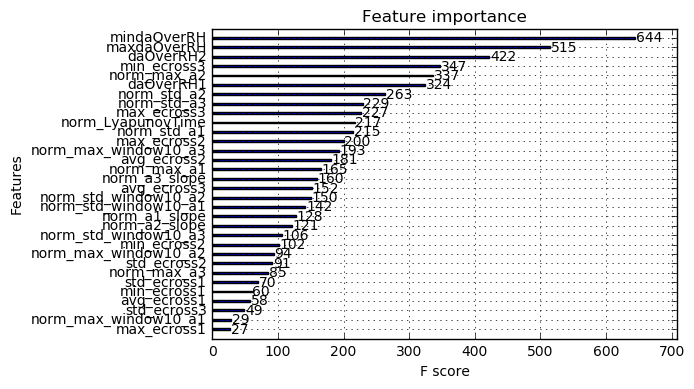

In [86]:
xgtrain = xgb.DMatrix(df[features].values, label=df['Stable'], feature_names = list(df[features].columns))
xgtest = xgb.DMatrix(dftest[features].values, label=dftest['Stable'], feature_names = list(dftest[features].columns))

model = xgb.train(params, xgtrain, num_boost_round=1000, feval=pr_auc)#, maximize=True)
#model = XGBClassifier(seed=27, learning_rate=0.01, n_estimators=10000)
#model.fit(df[features], df['Stable'],eval_metric=blah, verbose=True)
        
#Predict training set:
#dtrain_predictions = model.predict(xgtrain)
#dtest_predictions = model.predict(xgtest)
#print(dtest_predictions)

dtrain_predprob = model.predict(xgtrain)
dtest_predprob = model.predict(xgtest)
dtrain_predictions = dtrain_predprob > 0.5
dtest_predictions = dtest_predprob > 0.5

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(dftest['Stable'].values, dtest_predictions)
#print "AUC Score (Train): %f" % metrics.roc_auc_score(df['Stable'], dtrain_predprob)
print "AUC Score (Test): %f" % pr_auc(dtest_predprob, dftest['Stable'].values)[1]


#feat_imp = pd.Series(model.booster().get_fscore()).sort_values(ascending=False)
#feat_imp.plot(kind='bar', title='Feature Importances', figsize=(12,8))
#plt.ylabel('Feature Importance Score')
xgb.plot_importance(model)

This function, adapted from Diana's notebook, does CV on the passed model, and prints out the optimal number of iterations for the adopted hyperparameters (`xgb.cv` will run up to `n_estimators` rounds, but if the CV score doesn't improve in `early_stopping_rounds` rounds, it will stop, and will return the sequence of CV scores with the last 50 cut out).


Model Report
Accuracy : 0.88
Precision/Recall AUC Score (Test): 0.894581


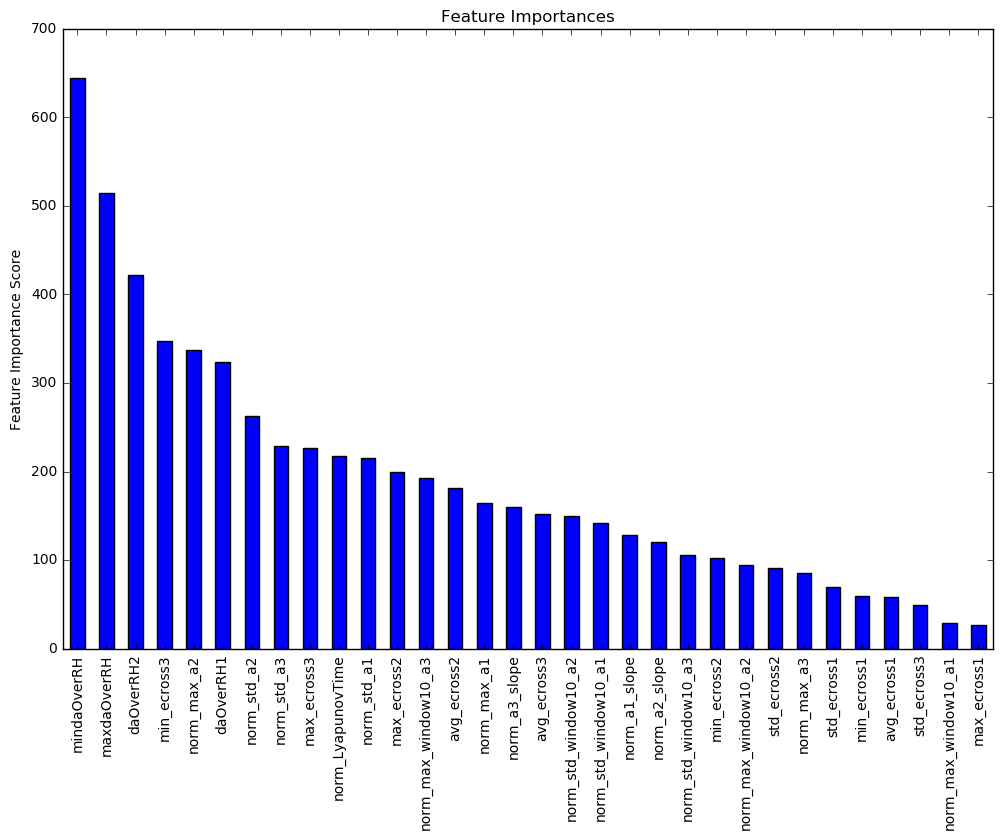

In [88]:
model = XGBClassifier(seed=27, learning_rate=0.01, n_estimators=1000)
model.fit(df[features], df['Stable'],eval_metric='auc')
        
#Predict training set:
dtrain_predictions = model.predict(df[features])
dtest_predictions = model.predict(dftest[features])
dtrain_predprob = model.predict_proba(df[features])[:,1]
dtest_predprob = model.predict_proba(dftest[features])[:,1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(dftest['Stable'].values, dtest_predictions)
#print "AUC Score (Train): %f" % metrics.roc_auc_score(df['Stable'], dtrain_predprob)
print "Precision/Recall AUC Score (Test): %f" % metrics.average_precision_score(dftest['Stable'], dtest_predprob)


feat_imp = pd.Series(model.booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances', figsize=(12,8))
plt.ylabel('Feature Importance Score')

In [10]:
def optimize_n_estimators(model, df, features, cv_folds=5, early_stopping_rounds=50):
    # xgb.cv performs CV at each boosting iteration, and stops when CV score doesn't improve, 
    # so we can use it to set the optimal number of boosting rounds num_boost_round (n_estimators)
    xgb_param = model.get_xgb_params()
    xgtrain = xgb.DMatrix(df[features].values, label=df['Stable'].values)
    cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=model.get_params()['n_estimators'], nfold=cv_folds,
        metrics='auc', early_stopping_rounds=early_stopping_rounds)
    
    testmeanauc = cvresult.tail(1).values[0,0]
    teststdauc = cvresult.tail(1).values[0,1]
    optimal_n_estimators = cvresult.index.values[-1]
    
    print("Learning Rate: {0}".format(model.learning_rate))
    print("CV score: {0} +/ {1}".format(testmeanauc, teststdauc/np.sqrt(cv_folds)))
    print("Optimal number of iterations (n_estimators) = {0}.".format(optimal_n_estimators))

The lower `n_estimators` is, the faster the models will train, so we want to pick a reasonably small value at first to optimize in the high dimensional hyperparameter space.  The lower the `learning_rate`, the more rounds (`n_estimators`) it needs to run.  `learning_rate` goes from [0,1], so let's see how many rounds we have to run at the high end of that range:

In [135]:
model = XGBClassifier(seed=27, n_estimators=10000)
learning_rates = np.linspace(0.05, 0.5, 10)
for learning_rate in learning_rates:
    model.set_params(learning_rate=learning_rate)
    optimize_n_estimators(model, df, features)

Learning Rate: 0.05
CV score: 0.9485648 +/ 0.00237954821594
Optimal number of iterations (n_estimators) = 352.
Learning Rate: 0.1
CV score: 0.9505146 +/ 0.00281937500308
Optimal number of iterations (n_estimators) = 285.
Learning Rate: 0.15
CV score: 0.9495908 +/ 0.00175926299114
Optimal number of iterations (n_estimators) = 110.
Learning Rate: 0.2
CV score: 0.9491176 +/ 0.00240936978648
Optimal number of iterations (n_estimators) = 76.
Learning Rate: 0.25
CV score: 0.9476702 +/ 0.00207636648788
Optimal number of iterations (n_estimators) = 67.
Learning Rate: 0.3
CV score: 0.9487864 +/ 0.00229559541035
Optimal number of iterations (n_estimators) = 36.
Learning Rate: 0.35
CV score: 0.9483358 +/ 0.00196920470038
Optimal number of iterations (n_estimators) = 33.
Learning Rate: 0.4
CV score: 0.9460712 +/ 0.00215037188226
Optimal number of iterations (n_estimators) = 15.
Learning Rate: 0.45
CV score: 0.945611 +/ 0.00200176953718
Optimal number of iterations (n_estimators) = 20.
Learning Rat

`learning_rate` = 0.2 does almost as well as 0.1, so let's run that one.  Let's choose a slightly higher `n_estimators` since as we vary the other parameters, 131 will no longer be the optimal value:

In [11]:
model.set_params(learning_rate=0.1, n_estimators=400)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=400, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=1)

I next tried to optimize `max_depth` and `min_child_weight` simultaneously.  This is not what Kristen suggested, but I was playing around and seeing as this data set is so tiny, there's no computational bottleneck at all.  `max_depth` is the depth of the trees, and we only have about 20 features, so don't need to test values > 20.

Here I set the ranges for the parameters

In [16]:
Nfolds = 5

In [91]:
Nfolds = 5
max_depth = [4, 8, 12, 18, 24]
min_child_weight = np.logspace(-1,1.3,5)

param_grid = dict(max_depth=max_depth, min_child_weight=min_child_weight)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring='average_precision',iid=False, cv=Nfolds)
grid.fit(df[features],df['Stable'])

# get the names of the parameters
param_names = param_grid.keys()
param_vals = [[val for val in param_grid[param_name]] for param_name in param_names]
param_val_names = {param_name:["{0}".format(val) for val in param_grid[param_name]] for param_name in param_names}

I wrote some functions to help visualize the results

In [12]:
%matplotlib inline
from matplotlib.colors import Normalize
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

def plotgrid(grid, vmin, vmax, midpoint):
    param_grid = grid.param_grid
    
    # get the names of the parameters
    param1 = param_grid.keys()[0]
    param2 = param_grid.keys()[1]

    # plot the scores of the grid
    # grid_scores_ contains parameter settings and scores
    # We extract just the scores
    scores = np.fabs([x[1] for x in grid.grid_scores_])
    scores = np.array(scores).reshape(len(param_grid[param1]), len(param_grid[param2]))

    plt.figure(figsize=(12, 6))
    plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot, norm=MidpointNormalize(vmin=vmin, vmax=vmax, midpoint=midpoint))
    plt.xlabel(param2)
    plt.ylabel(param1)
    plt.colorbar()
    plt.xticks(np.arange(len(param_grid[param2])), np.round(param_grid[param2], decimals=2))
    plt.yticks(np.arange(len(param_grid[param1])), np.round(param_grid[param1], decimals=2))
    plt.title('CV Score')
    plt.show()
       
def plot1dcut(grid, param_names, fixed_param_name, fixed_value_name):
    fixed_value = float(fixed_value_name)
    param_grid = grid.param_grid
    
    # Each entry x in grid.grid_scores_ has all the CV scores in x[2]
    scores = np.fabs([np.mean(x[2]) for x in grid.grid_scores_])
    stds = np.fabs([np.std(x[2]) for x in grid.grid_scores_])
    scores = np.array(scores).reshape(len(param_grid[param_names[0]]), len(param_grid[param_names[1]]))
    stds = np.array(stds).reshape(len(param_grid[param_names[0]]), len(param_grid[param_names[1]]))
    
    plt.figure(figsize=(8, 6))
    fig, ax = plt.subplots()
    
    if fixed_param_name == param_names[0]:
        xvals = param_grid[param_names[1]] # take all the values in param grid for the other parameter
        mask = np.isclose(np.array(grid.param_grid[fixed_param_name]), fixed_value) # make masked array of passed parameter to pick out right index
        yvals = scores[mask,:].flatten()
        errs = stds[mask,:].flatten()/np.sqrt(Nfolds)
        ax.set_xlabel(param_names[1])

    elif fixed_param_name == param_names[1]:
        xvals = param_grid[param_names[0]] # take all the values in param grid for the other parameter
        mask = np.isclose(np.array(grid.param_grid[fixed_param_name]), fixed_value) # make masked array of passed parameter to pick out right index
        yvals = scores[:,mask].flatten()
        errs = stds[:,mask].flatten()/np.sqrt(Nfolds)
        ax.set_xlabel(param_names[0])

    ax.errorbar(xvals, yvals, errs)
    ax.set_ylabel('CV score')
    ax.set_title("{0} = {1}".format(fixed_param_name, fixed_value))
    plt.show()

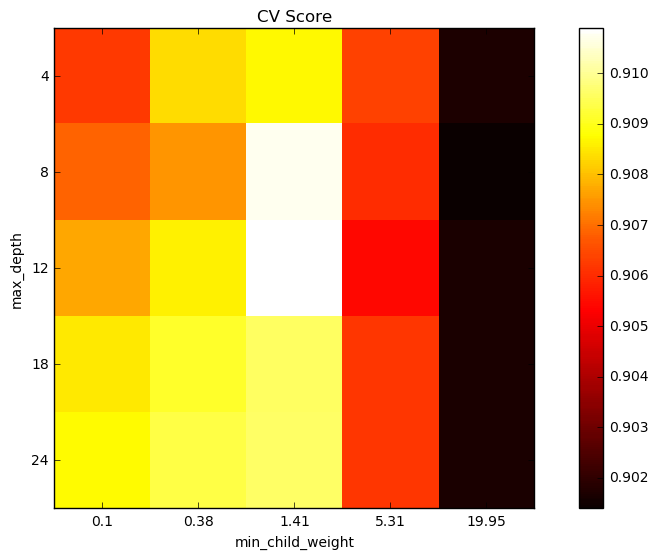

<function __main__.plotgrid>

In [93]:
# get the scores and values for the sliders
scores = np.fabs([x[1] for x in grid.grid_scores_])
vmin = np.min(scores)
vmax = np.max(scores)
mean = np.mean(scores)
step = (vmax-vmin)/100.

widgets.interact(plotgrid, grid=fixed(grid), vmin=FloatSlider(min=vmin, max=vmax, step=step, value=vmin), 
                 vmax=FloatSlider(min=vmin, max=vmax, step=step, value=vmax), 
                 midpoint=FloatSlider(min=vmin, max=vmax, step=step, value=mean))

The sliders allow you to change the color scales so you're not swamped by terrible scores or have trouble discerning nearby CV scores.  Here the grid is very coarse, so don't need to use it.  

Now we tighten the grid a bit:

In [13]:
max_depth = [6,8,10,12,14,16]
min_child_weight = np.logspace(np.log10(0.3),np.log10(5), 10)

param_grid = dict(max_depth=max_depth, min_child_weight=min_child_weight)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring='average_precision',iid=False, cv=5)
grid.fit(df[features],df['Stable'])

# get the names of the parameters
param_names = param_grid.keys()
param_vals = [[val for val in param_grid[param_name]] for param_name in param_names]
param_val_names = {param_name:["{0}".format(val) for val in param_grid[param_name]] for param_name in param_names}

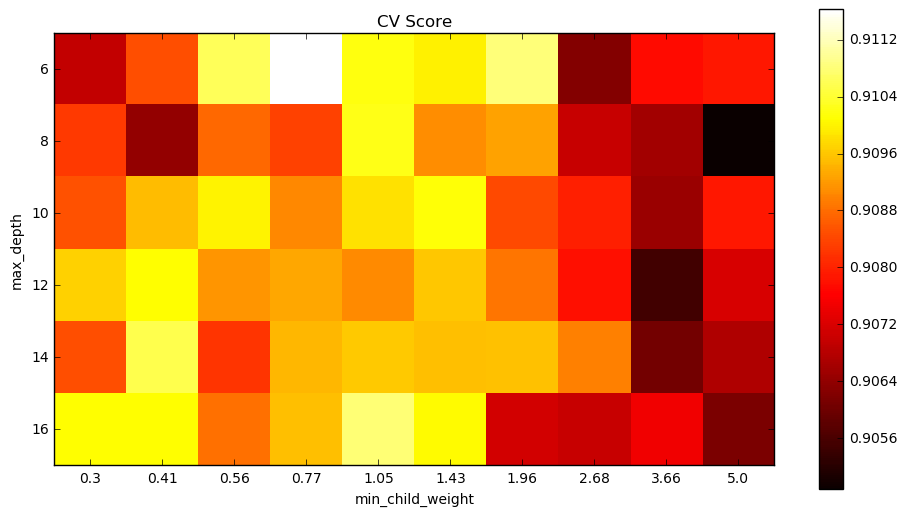

<function __main__.plotgrid>

In [14]:
# get the scores and values for the sliders
scores = np.fabs([x[1] for x in grid.grid_scores_])
vmin = np.min(scores)
vmax = np.max(scores)
mean = np.mean(scores)
step = (vmax-vmin)/100.

widgets.interact(plotgrid, grid=fixed(grid), vmin=FloatSlider(min=vmin, max=vmax, step=step, value=vmin), 
                 vmax=FloatSlider(min=vmin, max=vmax, step=step, value=vmax), 
                 midpoint=FloatSlider(min=vmin, max=vmax, step=step, value=mean))

Here the sliders help a bit more.  Looks like `max_depth = 12`, `min_child_weight`=30 is a region with good scores.  The widgets below allow you to look at 1D cuts through the 2D plot above:

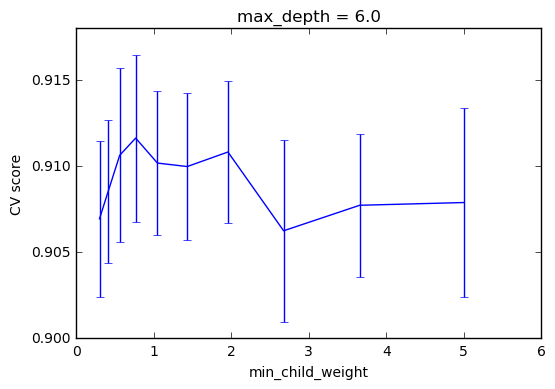

<function __main__.plot1dcut>

In [17]:
fixed_param=param_names[0]
widgets.interact(plot1dcut, grid=fixed(grid), param_names = fixed(param_names), fixed_param_name = fixed(fixed_param), fixed_value_name=SelectionSlider(description=fixed_param, options=param_val_names[fixed_param]))

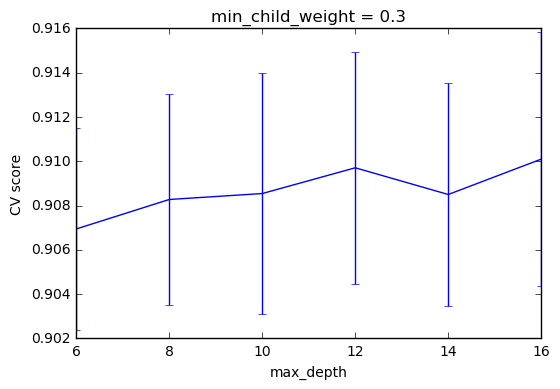

<function __main__.plot1dcut>

In [18]:
fixed_param=param_names[1]
widgets.interact(plot1dcut, grid=fixed(grid), param_names = fixed(param_names), fixed_param_name = fixed(fixed_param), fixed_value_name=SelectionSlider(description=fixed_param, options=param_val_names[fixed_param]))

Lower values of max_depth and higher values of min_child_weight help avoid overfitting, but if you go too far the model will do badly.  So I think we want to go with more conservative values.  Here it seems like max_depth of 4 does well, which I think suggests we don't have many features that will help the algorithm!  So let's choose:

In [19]:
model.set_params(max_depth=8, min_child_weight=1.2)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=8,
       min_child_weight=1.2, missing=None, n_estimators=400, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=1)

In [20]:
subsample = np.linspace(0.2,1,5, endpoint=True)
colsample_bytree = np.linspace(0.5,1,5, endpoint=True)

param_grid = dict(subsample=subsample, colsample_bytree=colsample_bytree)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring='average_precision',iid=False, cv=5)
grid.fit(df[features],df['Stable'])

# get the names of the parameters
param_names = param_grid.keys()
param_vals = [[val for val in param_grid[param_name]] for param_name in param_names]
param_val_names = {param_name:["{0}".format(val) for val in param_grid[param_name]] for param_name in param_names}

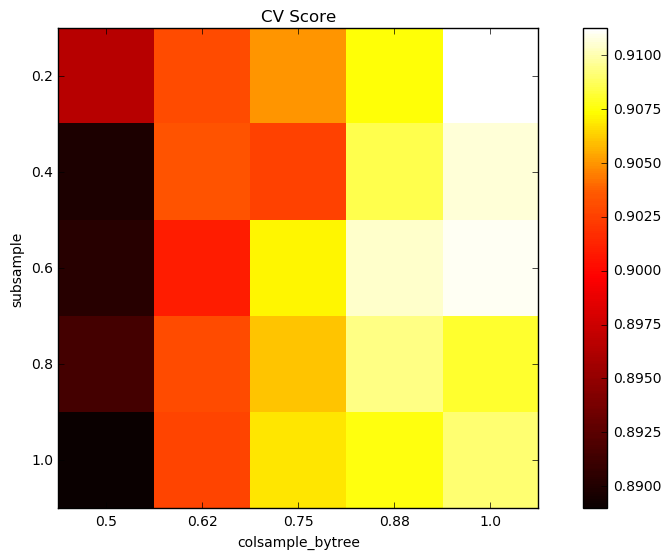

<function __main__.plotgrid>

In [21]:
# get the scores and values for the sliders
scores = np.fabs([x[1] for x in grid.grid_scores_])
vmin = np.min(scores)
vmax = np.max(scores)
mean = np.mean(scores)
step = (vmax-vmin)/100.

widgets.interact(plotgrid, grid=fixed(grid), vmin=FloatSlider(min=vmin, max=vmax, step=step, value=vmin), 
                 vmax=FloatSlider(min=vmin, max=vmax, step=step, value=vmax), 
                 midpoint=FloatSlider(min=vmin, max=vmax, step=step, value=mean))

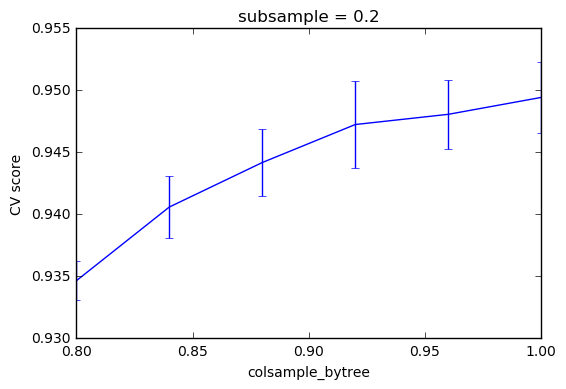

<function __main__.plot1dcut>

In [17]:
fixed_param=param_names[0]
widgets.interact(plot1dcut, grid=fixed(grid), param_names = fixed(param_names), fixed_param_name = fixed(fixed_param), fixed_value_name=SelectionSlider(description=fixed_param, options=param_val_names[fixed_param]))

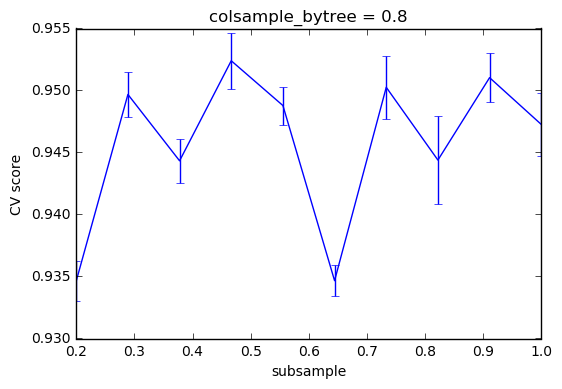

<function __main__.plot1dcut>

In [18]:
fixed_param=param_names[1]
widgets.interact(plot1dcut, grid=fixed(grid), param_names = fixed(param_names), fixed_param_name = fixed(fixed_param), fixed_value_name=SelectionSlider(description=fixed_param, options=param_val_names[fixed_param]))

We choose the approximate maximum:

In [22]:
model.set_params(subsample=0.5, colsample_bytree=1.)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1.0,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=8,
       min_child_weight=1.2, missing=None, n_estimators=400, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.5)

Now we lower the `learning_rate` (so we have to raise `n_estimators`) to get a slightly better model:

In [24]:
model.set_params(n_estimators=5000)
learning_rate = np.logspace(-3, -0.5, 10)

param_grid = dict(learning_rate=learning_rate)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring='average_precision',iid=False, cv=5)
grid.fit(df[features],df['Stable'])

# get the names of the parameters
param_names = param_grid.keys()
param_vals = [[val for val in param_grid[param_name]] for param_name in param_names]
param_val_names = {param_name:["{0}".format(val) for val in param_grid[param_name]] for param_name in param_names}

In [25]:
grid.grid_scores_

[mean: 0.90839, std: 0.01308, params: {'learning_rate': 0.001},
 mean: 0.91047, std: 0.01235, params: {'learning_rate': 0.0018957356524063754},
 mean: 0.91085, std: 0.01176, params: {'learning_rate': 0.0035938136638046258},
 mean: 0.90824, std: 0.01213, params: {'learning_rate': 0.0068129206905796153},
 mean: 0.90624, std: 0.01149, params: {'learning_rate': 0.01291549665014884},
 mean: 0.90382, std: 0.01339, params: {'learning_rate': 0.024484367468222266},
 mean: 0.90365, std: 0.01231, params: {'learning_rate': 0.046415888336127795},
 mean: 0.90082, std: 0.01316, params: {'learning_rate': 0.087992254356910743},
 mean: 0.89676, std: 0.01032, params: {'learning_rate': 0.1668100537200059},
 mean: 0.89618, std: 0.00621, params: {'learning_rate': 0.31622776601683794}]

So this is probably close to our best model:

In [26]:
model.set_params(learning_rate=0.002, n_estimators=5000)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1.0,
       gamma=0, learning_rate=0.002, max_delta_step=0, max_depth=8,
       min_child_weight=1.2, missing=None, n_estimators=5000, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.5)

In [27]:
model.fit(df[features], df['Stable'])
        
#Predict training set:
dtrain_predictions = model.predict(df[features])
dtest_predictions = model.predict(dftest[features])
dtrain_predprob = model.predict_proba(df[features])[:,1]
dtest_predprob = model.predict_proba(dftest[features])[:,1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(dftest['Stable'].values, dtest_predictions)
#print "AUC Score (Train): %f" % metrics.roc_auc_score(df['Stable'], dtrain_predprob)
print "AUC Score (Test): %f" % metrics.average_precision_score(dftest['Stable'], dtest_predprob)


Model Report
Accuracy : 0.8893
AUC Score (Test): 0.901066


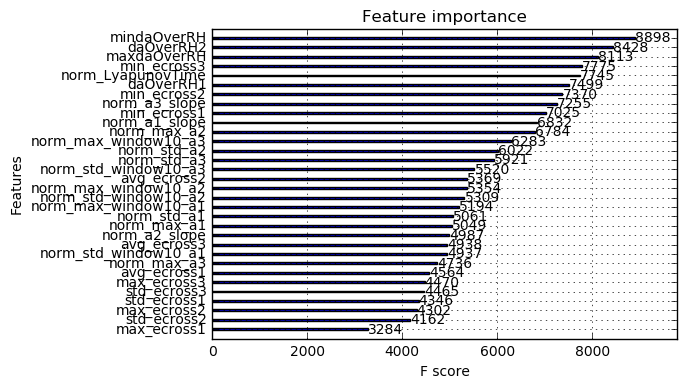

In [28]:
xgb.plot_importance(model)

In [ ]:
ari = dftest[["daOverRH1", "daOverRH2"]]
ari['P2/P1'] = dftest['P2']/dftest['P1']
ari['P3/P2'] = dftest['P3']/dftest['P2']
ari["predprob"] = model.predict_proba(dftest[features])[:,1]
ari["predstable"] = ari["predprob"]>0.45
ari["Norbits_instability"] = dftest["Norbits_instability"]

In [30]:
dftest["y_pred"] = model.predict_proba(dftest[features])[:,1]
dftest.tail()

,Stable,Norbits_instability,Norbits,Mplanet,RH/a,a1,P1,e1,pomega1,inc1,...,norm_min_window10_e2,norm_min_e3,norm_min_window10_e3,norm_min_inc1,norm_min_window10_inc1,norm_min_inc2,norm_min_window10_inc2,norm_min_inc3,norm_min_window10_inc3,y_pred
Sim_ID,,,,,,,,,,,,,,,,,,,,,
3189,True,1.000000e+07,10000000.0,0.000015,0.021544,0.058617,0.014192,0.015881,-2.477519,0.014474,...,0.008062,0.000085,0.024593,0.000107,0.000610,0.000093,0.001062,0.000214,8.957564e-07,0.302641
468,False,2.712704e+04,10000000.0,0.000015,0.021544,0.059914,0.014665,0.003740,-2.241450,0.006668,...,0.056411,0.000001,0.090411,0.000205,0.000846,0.000088,0.001346,0.000611,5.623516e-04,0.009018
1581,True,1.000000e+07,10000000.0,0.000015,0.021544,0.053190,0.012267,0.009476,2.538135,0.012662,...,0.031199,0.000106,0.005515,0.000466,0.000243,0.000099,0.003004,0.000554,1.450827e-03,0.918217
3484,False,6.276198e+06,10000000.0,0.000015,0.021544,0.053380,0.012333,0.012028,-5.486679,0.017237,...,0.000539,0.000032,0.016502,0.000156,0.001146,0.000093,0.002320,0.000223,7.816216e-04,0.616970
1050,False,2.954313e+05,10000000.0,0.000015,0.021544,0.046440,0.010008,0.006941,-1.087950,0.015286,...,0.003373,0.000049,0.010093,0.000490,0.000791,0.000432,0.001049,0.001139,4.961096e-03,0.021438


In [46]:
unstablewrong = dftest[(dftest['Stable']==True)& (dftest["y_pred"] < 0.2)]
unstablewrong

,Stable,Norbits_instability,Norbits,Mplanet,RH/a,a1,P1,e1,pomega1,inc1,...,norm_min_window10_e2,norm_min_e3,norm_min_window10_e3,norm_min_inc1,norm_min_window10_inc1,norm_min_inc2,norm_min_window10_inc2,norm_min_inc3,norm_min_window10_inc3,y_pred
Sim_ID,,,,,,,,,,,,,,,,,,,,,
4297,True,10000000.0,10000000.0,0.000015,0.021544,0.058405,0.014115,0.013632,1.717123,0.010011,...,0.013770,0.000006,0.115872,0.000623,0.000399,0.000022,0.001171,0.000181,0.001591,0.171007
1863,True,10000000.0,10000000.0,0.000015,0.021544,0.047776,0.010443,0.015671,1.481510,0.004846,...,0.006013,0.000005,0.003644,0.000011,0.000426,0.000036,0.002086,0.000150,0.005145,0.090526
2999,True,10000000.0,10000000.0,0.000015,0.021544,0.053516,0.012380,0.001095,1.336931,0.000257,...,0.021468,0.000131,0.018493,0.000018,0.059510,0.000148,0.000603,0.000193,0.000860,0.008998
3115,True,10000000.0,10000000.0,0.000015,0.021544,0.056915,0.013578,0.001828,3.568167,0.001453,...,0.008678,0.000010,0.025895,0.000244,0.002527,0.000646,0.000309,0.000075,0.000079,0.116217
4524,True,10000000.0,10000000.0,0.000015,0.021544,0.045699,0.009769,0.010920,3.141713,0.004383,...,0.027007,0.000097,0.001415,0.000113,0.000549,0.000033,0.001228,0.000074,0.000489,0.186680
689,True,10000000.0,10000000.0,0.000015,0.021544,0.052169,0.011916,0.009564,-0.382331,0.017295,...,0.003071,0.000214,0.036606,0.000579,0.000128,0.000926,0.003962,0.000151,0.000274,0.192725
184,True,10000000.0,10000000.0,0.000015,0.021544,0.045518,0.009711,0.014003,2.093964,0.014138,...,0.018518,0.000409,0.009070,0.000019,0.000012,0.000086,0.000551,0.000371,0.000208,0.183499
4670,True,10000000.0,10000000.0,0.000015,0.021544,0.048631,0.010724,0.000893,5.477631,0.009043,...,0.030665,0.000443,0.076716,0.000245,0.003232,0.000062,0.002613,0.000051,0.000671,0.092386
1622,True,10000000.0,10000000.0,0.000015,0.021544,0.048946,0.010829,0.003269,0.757614,0.002748,...,0.007742,0.000164,0.038065,0.000209,0.003568,0.000044,0.000120,0.000752,0.000852,0.013166


In [44]:
unstablecorrect = dftest[(dftest['Stable']==False)& (dftest["y_pred"] < 0.2)]

In [45]:
unstablecorrect.head(20)

,Stable,Norbits_instability,Norbits,Mplanet,RH/a,a1,P1,e1,pomega1,inc1,...,norm_min_window10_e2,norm_min_e3,norm_min_window10_e3,norm_min_inc1,norm_min_window10_inc1,norm_min_inc2,norm_min_window10_inc2,norm_min_inc3,norm_min_window10_inc3,y_pred
Sim_ID,,,,,,,,,,,,,,,,,,,,,
3471,False,8.233677e+05,10000000.0,0.000015,0.021544,0.046764,0.010113,0.015860,1.880579,0.012391,...,0.004332,0.000179,0.015675,0.000293,0.000242,0.000046,0.000635,0.000009,0.000270,0.008978
3849,False,7.204145e+03,10000000.0,0.000015,0.021544,0.042360,0.008718,0.014634,-0.601227,0.009680,...,0.041751,0.000054,0.036828,0.000012,0.006989,0.000762,0.002772,0.000394,0.001563,0.000914
3537,False,5.851915e+03,10000000.0,0.000015,0.021544,0.053215,0.012276,0.016287,-3.618376,0.012772,...,0.091574,0.000048,0.015606,0.000246,0.004709,0.000930,0.008343,0.000694,0.000366,0.001462
4214,False,6.435885e+06,10000000.0,0.000015,0.021544,0.054681,0.012787,0.012152,2.292604,0.009484,...,0.065076,0.000003,0.018345,0.000280,0.000247,0.000108,0.009791,0.001519,0.002027,0.029608
4766,False,2.506675e+06,10000000.0,0.000015,0.021544,0.055361,0.013026,0.018525,0.444566,0.016894,...,0.010005,0.000157,0.025186,0.000936,0.000200,0.000281,0.000001,0.000048,0.002151,0.113019
1344,False,2.732746e+04,10000000.0,0.000015,0.021544,0.048337,0.010627,0.011736,1.276011,0.004119,...,0.038986,0.000166,0.001923,0.000163,0.000592,0.001083,0.001327,0.000009,0.005670,0.002043
2766,False,6.384037e+04,10000000.0,0.000015,0.021544,0.049733,0.011091,0.014592,1.356425,0.015504,...,0.004186,0.001054,0.011873,0.000268,0.001595,0.000466,0.000615,0.000022,0.000118,0.002138
2747,False,4.395730e+05,10000000.0,0.000015,0.021544,0.044777,0.009475,0.018424,-4.642484,0.005021,...,0.045979,0.000129,0.034424,0.000502,0.000703,0.000068,0.000520,0.000001,0.002148,0.013452
1502,False,1.909149e+06,10000000.0,0.000015,0.021544,0.043385,0.009037,0.008600,-0.879903,0.009561,...,0.005856,0.000620,0.115301,0.000046,0.001035,0.000053,0.000517,0.000297,0.003519,0.023992


In [34]:
correct = dftest[(dftest['Stable'] == True) & (dftest["y_pred"] > 0.98)]

In [35]:
correct.head(20)

,Stable,Norbits_instability,Norbits,Mplanet,RH/a,a1,P1,e1,pomega1,inc1,...,norm_min_window10_e2,norm_min_e3,norm_min_window10_e3,norm_min_inc1,norm_min_window10_inc1,norm_min_inc2,norm_min_window10_inc2,norm_min_inc3,norm_min_window10_inc3,y_pred
Sim_ID,,,,,,,,,,,,,,,,,,,,,
1229,True,10000000.0,10000000.0,0.000015,0.021544,0.042544,0.008775,0.002086,2.089051,0.003208,...,0.019854,0.000201,0.010559,0.000196,0.006560,3.612890e-04,7.799323e-04,0.000124,0.001532,0.992075
1644,True,10000000.0,10000000.0,0.000015,0.021544,0.049041,0.010860,0.000342,0.154817,0.011433,...,0.001285,0.000209,0.013816,0.000257,0.000247,1.890727e-04,2.535512e-03,0.000305,0.000074,0.997174
759,True,10000000.0,10000000.0,0.000015,0.021544,0.041181,0.008357,0.006286,-1.417579,0.007818,...,0.007970,0.000094,0.006187,0.000052,0.000115,7.661163e-04,2.722418e-02,0.000446,0.000051,0.987412
4470,True,10000000.0,10000000.0,0.000015,0.021544,0.045170,0.009600,0.017861,0.765424,0.017440,...,0.042128,0.000174,0.008893,0.000182,0.000263,4.184453e-04,8.579108e-04,0.000006,0.000287,0.994861
516,True,10000000.0,10000000.0,0.000015,0.021544,0.056298,0.013358,0.015377,-0.521962,0.011079,...,0.010447,0.000218,0.062592,0.000166,0.000107,1.337843e-04,3.055033e-04,0.000232,0.000210,0.990456
427,True,10000000.0,10000000.0,0.000015,0.021544,0.043273,0.009002,0.000912,1.842289,0.011762,...,0.003072,0.000158,0.010561,0.000169,0.000025,6.722698e-07,1.319540e-03,0.000173,0.001122,0.985271
3913,True,10000000.0,10000000.0,0.000015,0.021544,0.045289,0.009638,0.005346,0.406201,0.004937,...,0.010856,0.000025,0.058476,0.000479,0.000492,2.689591e-05,2.197276e-04,0.000527,0.000051,0.998074
3121,True,10000000.0,10000000.0,0.000015,0.021544,0.052576,0.012055,0.003575,-0.377548,0.012590,...,0.060493,0.000135,0.043565,0.000138,0.000530,1.056355e-04,6.846162e-04,0.000299,0.000089,0.998331
1,True,10000000.0,10000000.0,0.000015,0.021544,0.042687,0.008820,0.005101,-3.170275,0.007845,...,0.005020,0.000221,0.094072,0.000659,0.001653,1.804000e-04,9.841648e-04,0.001237,0.000803,0.995850


In [43]:
misclass = dftest[(dftest['Stable'] == False) & (dftest["y_pred"] > 0.8)]
misclass

,Stable,Norbits_instability,Norbits,Mplanet,RH/a,a1,P1,e1,pomega1,inc1,...,norm_min_window10_e2,norm_min_e3,norm_min_window10_e3,norm_min_inc1,norm_min_window10_inc1,norm_min_inc2,norm_min_window10_inc2,norm_min_inc3,norm_min_window10_inc3,y_pred
Sim_ID,,,,,,,,,,,,,,,,,,,,,
4002,False,1.285084e+06,10000000.0,0.000015,0.021544,0.058205,0.014042,0.016157,0.160546,0.013167,...,0.025612,0.000020,0.007111,0.000452,0.000333,2.544124e-04,0.016016,0.000265,0.000351,0.950468
3171,False,4.649017e+06,10000000.0,0.000015,0.021544,0.048331,0.010625,0.014698,-1.691686,0.009383,...,0.005653,0.000632,0.081556,0.000834,0.001250,2.490119e-04,0.001790,0.000324,0.000161,0.829494
2358,False,8.431091e+06,10000000.0,0.000015,0.021544,0.054406,0.012690,0.016356,-2.213547,0.014455,...,0.011051,0.000073,0.041304,0.000984,0.001248,2.233575e-05,0.000100,0.000223,0.001420,0.848335
1777,False,2.408925e+06,10000000.0,0.000015,0.021544,0.051765,0.011777,0.017399,0.148569,0.004282,...,0.000908,0.000290,0.013469,0.000758,0.001540,2.228575e-04,0.001034,0.001752,0.000328,0.864705
4404,False,2.993244e+06,10000000.0,0.000015,0.021544,0.049501,0.011013,0.001038,-4.364727,0.013987,...,0.010734,0.000221,0.000878,0.000138,0.000278,4.935289e-04,0.001388,0.000353,0.001134,0.926862
2487,False,3.973838e+06,10000000.0,0.000015,0.021544,0.059417,0.014483,0.003450,2.960035,0.011546,...,0.003665,0.000375,0.002275,0.000085,0.000321,9.055583e-04,0.000920,0.000410,0.000010,0.898474
1042,False,4.722415e+06,10000000.0,0.000015,0.021544,0.044990,0.009543,0.017693,-3.208836,0.017402,...,0.044989,0.000875,0.000461,0.000216,0.001197,6.645063e-05,0.000996,0.000029,0.000012,0.814766
3633,False,3.778554e+06,10000000.0,0.000015,0.021544,0.045617,0.009743,0.011177,-3.613722,0.001953,...,0.001842,0.000005,0.000274,0.000696,0.000605,3.424484e-05,0.000348,0.000127,0.001372,0.905829
313,False,8.667267e+06,10000000.0,0.000015,0.021544,0.051292,0.011616,0.017445,1.211552,0.002447,...,0.010826,0.000267,0.001848,0.000754,0.003719,5.064181e-04,0.000215,0.000714,0.001024,0.945241


In [153]:
misclass["P3/P2"] = misclass["P3"]/misclass["P2"]
misclass["P3/P1"] = misclass["P3"]/misclass["P1"]
misclass["P2/P1"] = misclass["P2"]/misclass["P1"]
misclass.head()

/mnt/raid-cita/dtamayo/p2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/mnt/raid-cita/dtamayo/p2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/mnt/raid-cita/dtamayo/p2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

,Stable,Norbits_instability,Norbits,Mplanet,RH/a,a1,P1,e1,pomega1,inc1,...,norm_min_inc1,norm_min_window10_inc1,norm_min_inc2,norm_min_window10_inc2,norm_min_inc3,norm_min_window10_inc3,y_pred,P3/P2,P3/P1,P2/P1
Sim_ID,,,,,,,,,,,,,,,,,,,,,
4002,False,1.285084e+06,10000000.0,0.000015,0.021544,0.058205,0.014042,0.016157,0.160546,0.013167,...,0.000452,0.000333,0.000254,0.016016,0.000265,0.000351,0.993154,1.287751,1.624417,1.261437
4404,False,2.993244e+06,10000000.0,0.000015,0.021544,0.049501,0.011013,0.001038,-4.364727,0.013987,...,0.000138,0.000278,0.000494,0.001388,0.000353,0.001134,0.991182,1.296650,1.589283,1.225683
2487,False,3.973838e+06,10000000.0,0.000015,0.021544,0.059417,0.014483,0.003450,2.960035,0.011546,...,0.000085,0.000321,0.000906,0.000920,0.000410,0.000010,0.997303,1.234291,1.569802,1.271825
1042,False,4.722415e+06,10000000.0,0.000015,0.021544,0.044990,0.009543,0.017693,-3.208836,0.017402,...,0.000216,0.001197,0.000066,0.000996,0.000029,0.000012,0.983174,1.295359,1.573216,1.214502
313,False,8.667267e+06,10000000.0,0.000015,0.021544,0.051292,0.011616,0.017445,1.211552,0.002447,...,0.000754,0.003719,0.000506,0.000215,0.000714,0.001024,0.985943,1.224388,1.591928,1.300183


In [186]:
sim_id = 4283
dfdist = pd.read_csv('/mnt/raid-cita/dtamayo/Stability/data/distribution/outputs'+str(sim_id)+'/distributionallfeatures'+str(sim_id)+'.csv', encoding='ascii')

In [187]:
dfdist.tail()

,Sim_ID,Stable,Norbits_instability,Norbits,Mplanet,RH/a,a1,P1,e1,pomega1,...,max_iH1,max_iH2,max_iH3,min_iH1,min_iH2,min_iH3,mean_std_iH,norm_a1_slope,norm_a2_slope,norm_a3_slope
995,995,False,4.220480e+06,10000000.0,0.000015,0.021544,0.045652,0.009754,0.013522,1.325028,...,0.504773,0.476772,0.476258,0.153493,0.142702,0.114034,0.138363,-5.063991e-10,2.003642e-09,-1.534471e-09
996,996,False,2.797826e+06,10000000.0,0.000015,0.021544,0.045652,0.009754,0.013522,1.325028,...,0.504773,0.476944,0.476258,0.153493,0.142702,0.114034,0.138374,-5.306702e-10,2.054205e-09,-1.556078e-09
997,997,False,2.938650e+06,10000000.0,0.000015,0.021544,0.045652,0.009754,0.013522,1.325028,...,0.504773,0.476783,0.476258,0.153493,0.142702,0.114034,0.138360,-5.011742e-10,1.993703e-09,-1.530899e-09
998,998,False,1.744611e+07,10000000.0,0.000015,0.021544,0.045652,0.009754,0.013522,1.325028,...,0.504773,0.476790,0.476258,0.153493,0.142702,0.114034,0.138359,-4.991493e-10,1.989510e-09,-1.529245e-09
999,999,False,2.035919e+06,10000000.0,0.000015,0.021544,0.045652,0.009754,0.013522,1.325028,...,0.504773,0.476781,0.476258,0.153493,0.142702,0.114034,0.138361,-5.020798e-10,1.995487e-09,-1.531564e-09


In [188]:
dfdist["y_pred"] = model.predict_proba(dfdist[features])[:,1]
dfdist.tail()

,Sim_ID,Stable,Norbits_instability,Norbits,Mplanet,RH/a,a1,P1,e1,pomega1,...,max_iH2,max_iH3,min_iH1,min_iH2,min_iH3,mean_std_iH,norm_a1_slope,norm_a2_slope,norm_a3_slope,y_pred
995,995,False,4.220480e+06,10000000.0,0.000015,0.021544,0.045652,0.009754,0.013522,1.325028,...,0.476772,0.476258,0.153493,0.142702,0.114034,0.138363,-5.063991e-10,2.003642e-09,-1.534471e-09,0.020058
996,996,False,2.797826e+06,10000000.0,0.000015,0.021544,0.045652,0.009754,0.013522,1.325028,...,0.476944,0.476258,0.153493,0.142702,0.114034,0.138374,-5.306702e-10,2.054205e-09,-1.556078e-09,0.033983
997,997,False,2.938650e+06,10000000.0,0.000015,0.021544,0.045652,0.009754,0.013522,1.325028,...,0.476783,0.476258,0.153493,0.142702,0.114034,0.138360,-5.011742e-10,1.993703e-09,-1.530899e-09,0.015805
998,998,False,1.744611e+07,10000000.0,0.000015,0.021544,0.045652,0.009754,0.013522,1.325028,...,0.476790,0.476258,0.153493,0.142702,0.114034,0.138359,-4.991493e-10,1.989510e-09,-1.529245e-09,0.016898
999,999,False,2.035919e+06,10000000.0,0.000015,0.021544,0.045652,0.009754,0.013522,1.325028,...,0.476781,0.476258,0.153493,0.142702,0.114034,0.138361,-5.020798e-10,1.995487e-09,-1.531564e-09,0.020058


In [189]:
dfdist.to_csv('/mnt/raid-cita/dtamayo/Stability/data/distribution/outputs'+str(sim_id)+'/distributionallfeatures'+str(sim_id)+'.csv', encoding='ascii')

In [55]:
savedf = pd.DataFrame()

In [58]:
Unstable.shape

(1056,)

In [59]:
Unstable

array([ 0.0089777 ,  0.00091435,  0.00146238, ...,  0.00901828,
        0.61697036,  0.02143756], dtype=float32)

In [67]:
np.savetxt('../data/StableSI.txt', Stable)
np.savetxt('../data/UnstableSI.txt', Unstable)

In [68]:
Stable2 = np.loadtxt('../data/StableSI.txt')
Unstable2 = np.loadtxt('../data/UnstableSI.txt')

(0, 160)

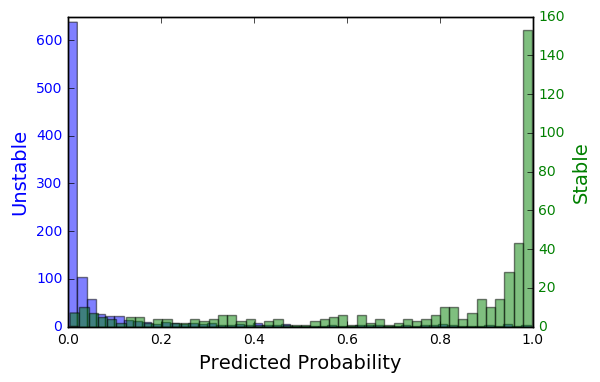

In [74]:
# Histogram:

bins = 50
y_pred=model.predict_proba(dftest[features])
Stable=y_pred[dftest['Stable'].values][:,1]
Unstable=y_pred[~dftest['Stable'].values][:,1]


#df['Predict'].loc[df['Truth']==1]

fig, ax1 = plt.subplots()
ax1.hist(Unstable, bins, alpha=0.5, label='No', color='blue')
ax1.set_xlabel('Predicted Probability', fontsize=14)
ax1.set_ylabel('Unstable',  fontsize=14, color='blue')
for tl in ax1.get_yticklabels():
    tl.set_color('blue')
    


ax2 = ax1.twinx()
ax2.hist(Stable, bins, alpha=0.5, label='Yes',color='green')
ax2.set_ylabel('Stable', fontsize=14, color='green')
for tl in ax2.get_yticklabels():
    tl.set_color('green')
 
ax1.set_ylim([0,650])
ax2.set_ylim([0,160])


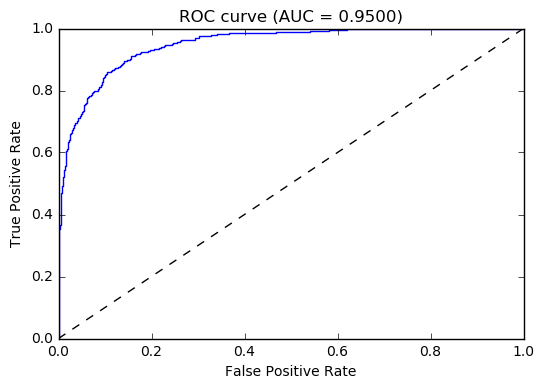

In [39]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(dftest['Stable'], y_pred[:,1])
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve (AUC = {0:.4f})'.format(metrics.roc_auc_score(dftest['Stable'], dtest_predprob)))

In [40]:
for i in range(0,len(fpr), 10):
    print("Threshold {0}, FPR = {1}, TPR = {2}".format(thresholds[i], fpr[i], tpr[i]))

Threshold 0.998456716537, FPR = 0.0, TPR = 0.00225225225225
Threshold 0.974306881428, FPR = 0.00473484848485, TPR = 0.364864864865
Threshold 0.945240974426, FPR = 0.0094696969697, TPR = 0.490990990991
Threshold 0.905829310417, FPR = 0.0142045454545, TPR = 0.554054054054
Threshold 0.850567042828, FPR = 0.0189393939394, TPR = 0.608108108108
Threshold 0.814766347408, FPR = 0.0236742424242, TPR = 0.641891891892
Threshold 0.781035363674, FPR = 0.030303030303, TPR = 0.671171171171
Threshold 0.72379565239, FPR = 0.0397727272727, TPR = 0.695945945946
Threshold 0.641465842724, FPR = 0.0492424242424, TPR = 0.718468468468
Threshold 0.581799268723, FPR = 0.0558712121212, TPR = 0.747747747748
Threshold 0.48786765337, FPR = 0.0643939393939, TPR = 0.777027027027
Threshold 0.441484302282, FPR = 0.0738636363636, TPR = 0.790540540541
Threshold 0.385277688503, FPR = 0.0871212121212, TPR = 0.806306306306
Threshold 0.341154247522, FPR = 0.0956439393939, TPR = 0.828828828829
Threshold 0.299286663532, FPR = 

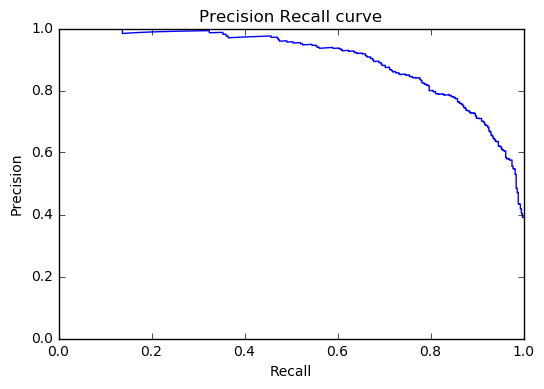

In [73]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(dftest['Stable'], y_pred[:,1])
fig, ax = plt.subplots()
ax.plot(recall, precision)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision Recall curve')

In [70]:
np.savetxt('../data/thresholdsSI.txt', thresholds)
np.savetxt('../data/recallSI.txt', recall)
np.savetxt('../data/precisionSI.txt', precision)

In [71]:
thresholds2 = np.loadtxt('../data/thresholdsSI.txt')
recall2 = np.loadtxt('../data/recallSI.txt')
precision2 = np.loadtxt('../data/precisionSI.txt')

In [49]:
for i in range(0,len(recall), 40):
    print("Threshold {0}, Precision = {1}, Recall = {2}".format(thresholds[i], precision[i], recall[i]))

Threshold 0.00475169671699, Precision = 0.390845070423, Recall = 1.0
Threshold 0.005955778528, Precision = 0.403284671533, Recall = 0.995495495495
Threshold 0.00739968614653, Precision = 0.418560606061, Recall = 0.995495495495
Threshold 0.00890228711069, Precision = 0.433070866142, Recall = 0.990990990991
Threshold 0.0106033794582, Precision = 0.449795081967, Recall = 0.988738738739
Threshold 0.013067801483, Precision = 0.469017094017, Recall = 0.988738738739
Threshold 0.0162865333259, Precision = 0.487723214286, Recall = 0.984234234234
Threshold 0.0201507415622, Precision = 0.510514018692, Recall = 0.984234234234
Threshold 0.0272658187896, Precision = 0.53431372549, Recall = 0.981981981982
Threshold 0.0323836877942, Precision = 0.557989690722, Recall = 0.975225225225
Threshold 0.043110653758, Precision = 0.58152173913, Recall = 0.963963963964
Threshold 0.0538457222283, Precision = 0.609195402299, Recall = 0.954954954955
Threshold 0.0745123773813, Precision = 0.637195121951, Recall = 0

In [158]:
quant = np.arange(0.01, 1.0, 0.01)*100
prob_Stable = np.percentile(Stable,quant)

quant_f = interp1d(prob_Stable, quant)
prob_f=interp1d(quant, prob_Stable)

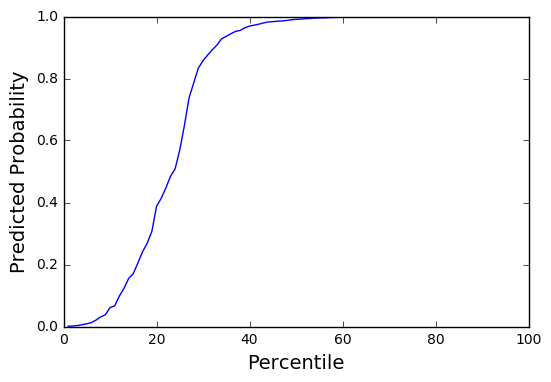

In [159]:
fig, ax = plt.subplots()
plt.plot(quant, prob_Stable)
ax.set_xlabel('Percentile', fontsize=14)
ax.set_ylabel('Predicted Probability', fontsize=14)
plt.show()

In [160]:
_tv = []
_accv = []
_accnormv = []
for i, thresh in enumerate(prob_Stable):
    _loc_yes = Stable >= thresh
    _loc_no = Unstable >= thresh
    _yes = Stable[_loc_yes].shape[0]
    _no = Unstable[_loc_no].shape[0]
    _total = _yes + _no
    if i % 5 == 0:
        print(thresh, _yes*100 / _total)
    _tv.append(thresh)
    _accv.append(_yes*100/_total)
#    _accnormv.append(_yes / Stable.shape[0] / (_yes / Stable.shape[0] + _no / Unstable.shape[0]))
_tv = np.asarray(_tv)
_accv = np.asarray(_accv)
#_accnormv = np.asarray(_accnormv)

(0.00081794015248306097, 47)
(0.012467288766056309, 62)
(0.066552091166377073, 71)
(0.20511073291301724, 76)
(0.41319544553756715, 80)
(0.64817973494529757, 83)
(0.87566278874874115, 88)
(0.94451756715774526, 91)
(0.97203314960002896, 93)
(0.98490604639053347, 94)
(0.9915162450075149, 96)
(0.99555012702941892, 96)
(0.99774528920650474, 96)
(0.99877018332481382, 97)
(0.9992425602674484, 96)
(0.99956818342208864, 98)
(0.99978247046470647, 98)
(0.99988732814788828, 100)
(0.99994443178176873, 100)
(0.99998286724090579, 100)


Pred prob for 90 percent accuracy: 0.936105
Pred prob for 80 percent accuracy: 0.446470


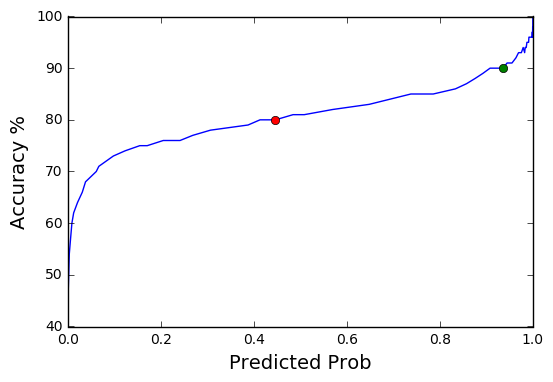

To obtain 90 percent accuracy need to go to 35 quantile
To obtain 80 percent accuracy need to go to 22 quantile


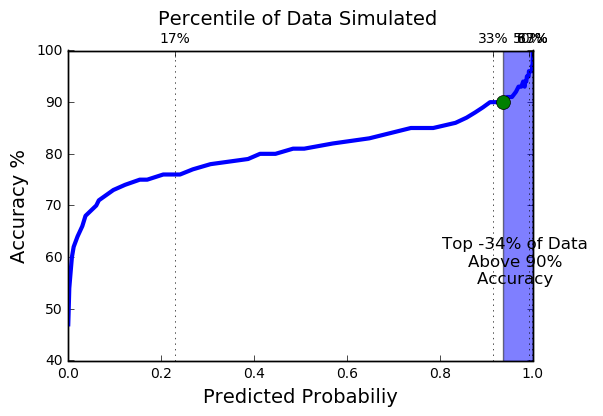

In [161]:
# Find 90% accuracy:
# calculate fit
thr_f = interp1d(_accv, _tv)

# calculate new x's and y's
thresh_fit = thr_f(_accv)
thresh_90=thr_f(90)
thresh_80=thr_f(80)

print('Pred prob for 90 percent accuracy: %f' % thresh_90)
print('Pred prob for 80 percent accuracy: %f' % thresh_80)

fig, ax1 = plt.subplots()
plt.plot(_tv, _accv , thresh_90, 90, 'o', thresh_80, 80, 'o')

ax1.set_xlabel('Predicted Prob', fontsize=14)
ax1.set_ylabel('Accuracy %', fontsize=14)
plt.show()

# calculate new x's and y's
quant_fit = quant_f(prob_Stable)
quant_acc90=quant_f(thresh_90)
quant_acc80=quant_f(thresh_80)
print('To obtain 90 percent accuracy need to go to %1.f quantile' % quant_acc90)
print('To obtain 80 percent accuracy need to go to %1.f quantile' % quant_acc80)


fig, ax1 = plt.subplots()
#plt.plot(f(_tv),_accv *100., f(thresh_90),0.9*100., 'o', markersize=10, color=orangeWCN, LineWidth=3)
ax1.plot(_tv,_accv, thresh_90, 90, 'o', markersize=10,  lw=3, zorder=60)
ax1.set_xlabel('Predicted Probabiliy', fontsize=14)

ax1.set_ylabel('Accuracy %', fontsize=14)
ay2 = ax1.twiny()

# setting grid:
#plt.grid()
xticks=prob_f(np.array([0.167, 0.333, 0.5, 0.667, 0.833])*100)
xlabels=['17%', '33%', '50%', '67%','83%']


ay2.xaxis.grid(True, which='major', zorder=50)

ay2.set_xlabel('Percentile of Data Simulated ' , fontsize=14)
ay2.set_xlim(ax1.get_xlim())
ay2.set_xticks(xticks, minor=False)
ay2.set_xticklabels(xlabels)



ax1.axvspan(thresh_90, 1, alpha=0.5, zorder=20)
legend = ax1.text((1-thresh_90)/2+thresh_90, 55, 'Top %.0f%% of Data \nAbove 90%% \nAccuracy ' %((1-quant_f(thresh_90))),
                  fontsize=12, ha='center', zorder=40)

